In [325]:
# missing value : age, cabin
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [326]:
titanic_data = pd.read_csv('train.csv')
titanic_data.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [327]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [328]:
titanic_data.duplicated().sum()

np.int64(0)

<Axes: xlabel='Age', ylabel='Count'>

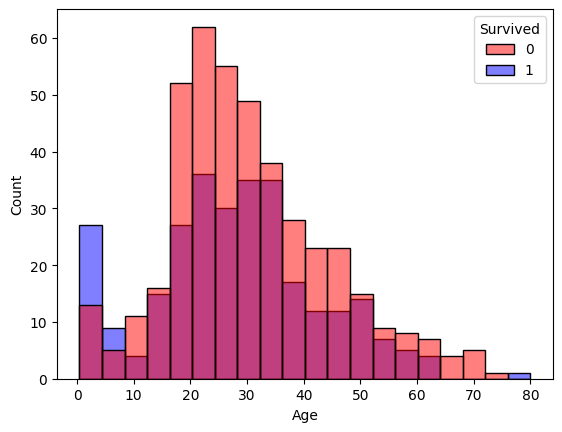

In [329]:
sns.histplot(x='Age',data=titanic_data, hue='Survived', palette=['red', 'blue'])

<Axes: xlabel='Family_size', ylabel='Count'>

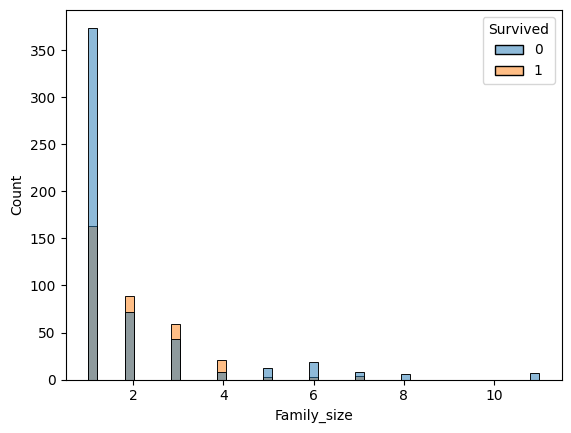

In [330]:
titanic_data['Family_size'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1
sns.histplot(x='Family_size', hue='Survived', data=titanic_data)

In [331]:


# 1. Calculate the median age from the data
median_age = titanic_data['Age'].median()
print(f"Median Age: {median_age}")

# 2. Fill missing 'Age' values using re-assignment (the correct way)
titanic_data['Age'] = titanic_data['Age'].fillna(median_age)

# 3. Check that it worked
print(f"Missing 'Age' values after filling: {titanic_data['Age'].isnull().sum()}")

# 4. Now, let's also re-run the 'Embarked' fix
mode_embarked = titanic_data['Embarked'].mode()[0]
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(mode_embarked)
print(f"Missing 'Embarked' values after filling: {titanic_data['Embarked'].isnull().sum()}")

Median Age: 28.0
Missing 'Age' values after filling: 0
Missing 'Embarked' values after filling: 0


In [332]:
# drop unnecessary columns
titanic_data = titanic_data.drop(columns=['Cabin', 'Ticket', 'PassengerId', 'Parch', 'SibSp', 'Name'])

In [333]:

# This will replace every 'female' with 1 and 'male' with 0
titanic_data['Sex'] = titanic_data['Sex'].map(lambda p: 1 if (p=='female') else 0)

In [334]:
# One-hot encoding 'Embarked'
titanic_data = pd.get_dummies(titanic_data, columns=['Embarked'])
titanic_data

,Survived,Pclass,Sex,Age,Fare,Family_size,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,7.2500,2,False,False,True
1,1,1,1,38.0,71.2833,2,True,False,False
2,1,3,1,26.0,7.9250,1,False,False,True
3,1,1,1,35.0,53.1000,2,False,False,True
4,0,3,0,35.0,8.0500,1,False,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,13.0000,1,False,False,True
887,1,1,1,19.0,30.0000,1,False,False,True
888,0,3,1,28.0,23.4500,4,False,False,True
889,1,1,0,26.0,30.0000,1,True,False,False


In [335]:
# standardized the featured values with standard scaler to prevent model being affected by large values
scaler = StandardScaler()
titanic_data[['Age', 'Fare', 'Family_size']] = scaler.fit_transform(titanic_data[['Age', 'Fare', 'Family_size']])

titanic_data

,Survived,Pclass,Sex,Age,Fare,Family_size,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,-0.565736,-0.502445,0.059160,False,False,True
1,1,1,1,0.663861,0.786845,0.059160,True,False,False
2,1,3,1,-0.258337,-0.488854,-0.560975,False,False,True
3,1,1,1,0.433312,0.420730,0.059160,False,False,True
4,0,3,0,0.433312,-0.486337,-0.560975,False,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,0,-0.181487,-0.386671,-0.560975,False,False,True
887,1,1,1,-0.796286,-0.044381,-0.560975,False,False,True
888,0,3,1,-0.104637,-0.176263,1.299429,False,False,True
889,1,1,0,-0.258337,-0.044381,-0.560975,True,False,False


In [336]:
# train and test data
X = titanic_data.drop(columns='Survived')
y = titanic_data['Survived']
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [337]:
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [338]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
y_pred

0.8044692737430168
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

[[90 15]
 [20 54]]


array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [339]:
df = pd.read_csv('./test.csv')
df['Family_size'] = df['SibSp'] + df['Parch'] + 1
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)

mode_embarked = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(mode_embarked)
passId = df['PassengerId']
df = df.drop(columns=['Cabin', 'Ticket', 'PassengerId', 'Parch', 'SibSp', 'Name'])
df

,Pclass,Sex,Age,Fare,Embarked,Family_size
0,3,male,34.5,7.8292,Q,1
1,3,female,47.0,7.0000,S,2
2,2,male,62.0,9.6875,Q,1
3,3,male,27.0,8.6625,S,1
4,3,female,22.0,12.2875,S,3
...,...,...,...,...,...,...
413,3,male,27.0,8.0500,S,1
414,1,female,39.0,108.9000,C,1
415,3,male,38.5,7.2500,S,1
416,3,male,27.0,8.0500,S,1


In [340]:


df['Sex'] = df['Sex'].map(lambda p: 1 if (p=='female') else 0)
df = pd.get_dummies(df, columns=['Embarked'])
median_fare = df['Fare'].median()
df['Fare'] = titanic_data['Fare'].fillna(median_fare)
scaler = StandardScaler()
df[['Age', 'Fare', 'Family_size']] = scaler.fit_transform(df[['Age', 'Fare', 'Family_size']])


In [341]:
df.isnull().sum()

Pclass         0
Sex            0
Age            0
Fare           0
Family_size    0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [355]:
y_pred = model.predict(df)
survived = pd.Series(y_pred, name='Survived')
submission = pd.DataFrame({
    'PassengerId': passId,
    'Survived': survived
})
submission.to_csv('submission.csv', index=False)

